In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Regression task

### Смотрим характеристики датасета

In [9]:
boston = datasets.load_boston()
boston.keys()
print(boston.DESCR[100:1300])
# boston

tics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black p

### Смотрим значение характеристик

In [10]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### График значений, которые будем предсказывать

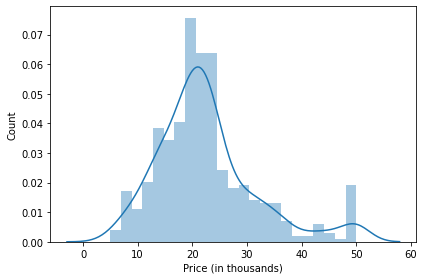

In [12]:
plt.figure(figsize=(6, 4))
sns.distplot(boston.target)
plt.xlabel('Price (in thousands)')
plt.ylabel('Count')
plt.tight_layout()

### Создаём модель на основе Линейной Регрессии как экземпляр класса и обучаем её

In [13]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
model = linear_regression.fit(boston.data, boston.target)

### Смотрим веса модели

In [15]:
feature_weight_df = pd.DataFrame(list(zip(boston.feature_names, model.coef_)))
feature_weight_df.columns = ['Feature', 'Weight']
print(feature_weight_dfLinearRegression()### Создаём модель на основе Линейной Регрессии как экземпляр класса и обучаем её)

    Feature     Weight
0      CRIM  -0.108011
1        ZN   0.046420
2     INDUS   0.020559
3      CHAS   2.686734
4       NOX -17.766611
5        RM   3.809865
6       AGE   0.000692
7       DIS  -1.475567
8       RAD   0.306049
9       TAX  -0.012335
10  PTRATIO  -0.952747
11        B   0.009312
12    LSTAT  -0.524758


### Делаем вручную прогноз для первого дома (умножаем весы на параметры)

In [16]:
import operator
first_predicted = sum(map(
lambda pair: operato### Смотрим веса моделиr.mul(*pair),
zip(model.coef_, boston.data[0])
))
first_predicted += model.intercept_
print(first_predicted)

30.003843377016743


### Получаем вектор прогнозов

In [19]:
predicted = model.predict(boston.data)
print(predicted[:10])

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211]


### Сравнительная таблица для прогнозов и истинных значений

In [21]:
predictions_ground_truth_df = pd.DataFrame(list(zip(predicted, boston.target)))
predictions_ground_truth_df.columns = ['Prediction', 'Ground truth']
predictions_ground_truth_df.head()

,Prediction,Ground truth
0,30.003843,24.0
1,25.025562,21.6
2,30.567597,34.7
3,28.607036,33.4
4,27.943524,36.2


### График показывающий погрешность прогнозов (чем ближе к диагонале тем вернее)

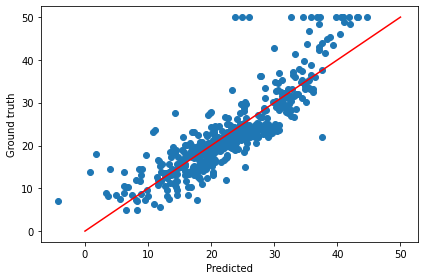

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(predicted, boston.target)
plt.xlabel('Predicted')
plt.ylabel('Ground truth')
plt.plot([0, 50], [0, 50], color="red")
plt.tight_layout()